In [3]:
from src.dashboard.data_api import getDocuments

[nltk_data] Downloading package wordnet to C:\Users\Yangliang
[nltk_data]     Lu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Yangliang
[nltk_data]     Lu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Yangliang
[nltk_data]     Lu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
docs = getDocuments('apple')

Installing adblock
Opening yahoo finance
5 urls found
28 urls found
Could not locate description
Could not locate description
Results: [{'title': 'Senator Warren cries antitrust in Beeper Mini affair', 'url': 'https://finance.yahoo.com/news/senator-warren-cries-antitrust-beeper-010400215.html', 'description': 'Senator Elizabeth Warren has publicly sided with Beeper in the public fight over iMessage access, using the issue to try and continue to push an anti-Big Tech agenda that has little relevancy in this particular matter.'}, {'title': 'Wedbush raises Apple price target again, to $250', 'url': 'https://finance.yahoo.com/news/wedbush-raises-apple-price-target-210010448.html', 'description': 'Wedbush continues to be impressed by Apple, raising its price target for the iPhone maker from $240 to $250, a second rise in a three-month period.'}, {'title': '12 Dow Stocks Billionaires Like The Most', 'url': 'https://finance.yahoo.com/news/12-dow-stocks-billionaires-most-180746813.html', 'desc

In [5]:
bodys = []
from src.dashboard.data_api import processDocumentUrl
for i in docs['results']:
	url = i['url']
	body = processDocumentUrl(url)['body']
	bodys.append(body)
bodys	

Processing https://finance.yahoo.com/news/senator-warren-cries-antitrust-beeper-010400215.html
Processing https://finance.yahoo.com/news/wedbush-raises-apple-price-target-210010448.html
Processing https://finance.yahoo.com/news/12-dow-stocks-billionaires-most-180746813.html
Processing https://finance.yahoo.com/news/display-panels-12-9-inch-170343287.html
Processing https://finance.yahoo.com/news/14-best-forever-stocks-buy-161025600.html
Processing https://finance.yahoo.com/m/f1c5de0c-b3f4-3963-bbc2-5ef64a94d859/1-artificial-intelligence.html
Processing https://finance.yahoo.com/news/m3-macbook-air-expected-march-150234726.html
Processing https://finance.yahoo.com/m/f4cf6e0b-4170-319e-b7a5-31a6ce1b1e99/2024-tech-revolution-3.html


['Senator Elizabeth Warren has publicly sided with Beeper in the public fight over iMessage access, using the issue to try and continue to push an anti-Big Tech agenda that has little relevancy in this particular matter.  Apple\'s decision to close down access to Beeper Mini and prevent the Android app from working on the iMessage network has reached the ears of U.S. lawmakers. In possibly the first noteworthy comment by a senator on the matter, it has been used as an opportunity to attack Apple, albeit with a bit of flawed logic.  Posted to X on Sunday, Senator Elizabeth Warren (D-MA) starts her response by confirming a fact. "Green bubble texts are less secure," Warren offers, which is true since green texts are unencrypted text messages, unlike the end-to-end encrypted blue ones. \n"So why would Apple block a new app allowing Android users to chat with iPhone users on iMessage?" the senator asks before offering her own take. "Big Tech executives are protecting profits by squashing c

In [6]:
from src.models.topic_model import fit_topic_model, find_topics_document_unique,  find_topics_document_multiple, plot_word_cloud_word_weight_per_topic, plot_topic_word_wordcount_weight, get_topic_word_weight

a,b,c = fit_topic_model(bodys)

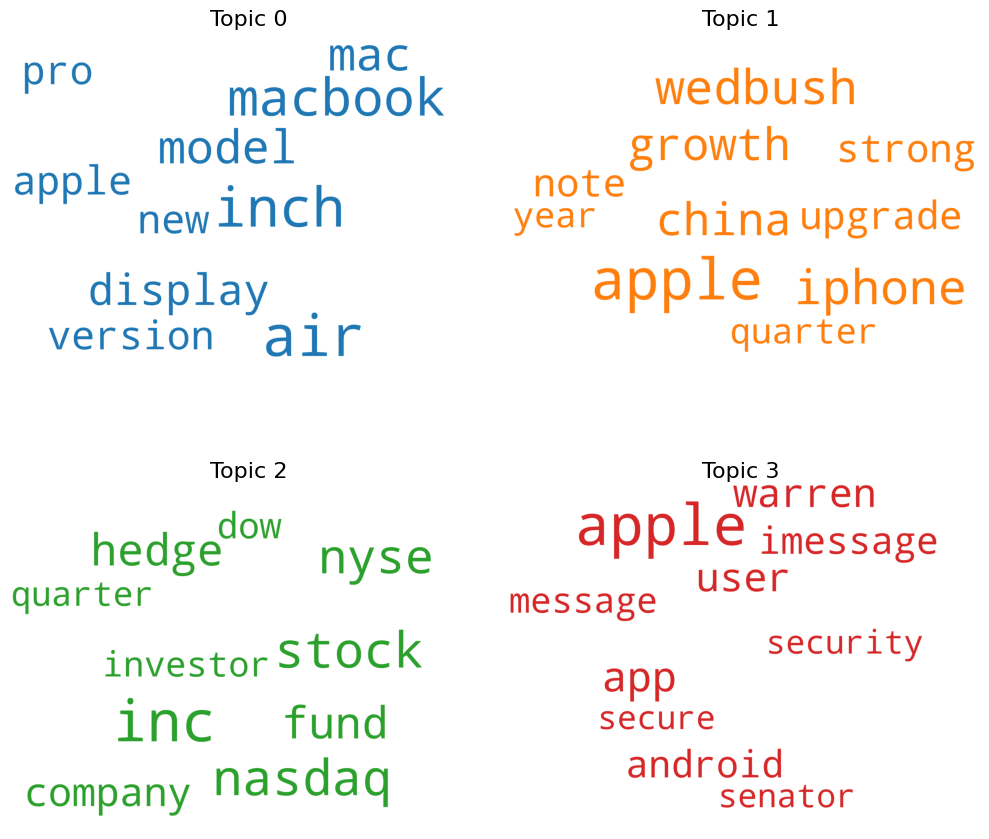

In [7]:
plot_word_cloud_word_weight_per_topic(a)

In [9]:
df, topic_set = get_topic_word_weight(a, bodys)

D:\UIUC\CSE_410_Information_Retrieval\AutoDash\src\models\topic_model.py:224: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
D:\UIUC\CSE_410_Information_Retrieval\AutoDash\src\models\topic_model.py:224: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
D:\UIUC\CSE_410_Information_Retrieval\AutoDash\src\models\topic_model.py:224: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
D:\UIUC\CSE_410_Information_Retrieval\AutoDash\src\models\topic_model.py:224: UserWarning: 

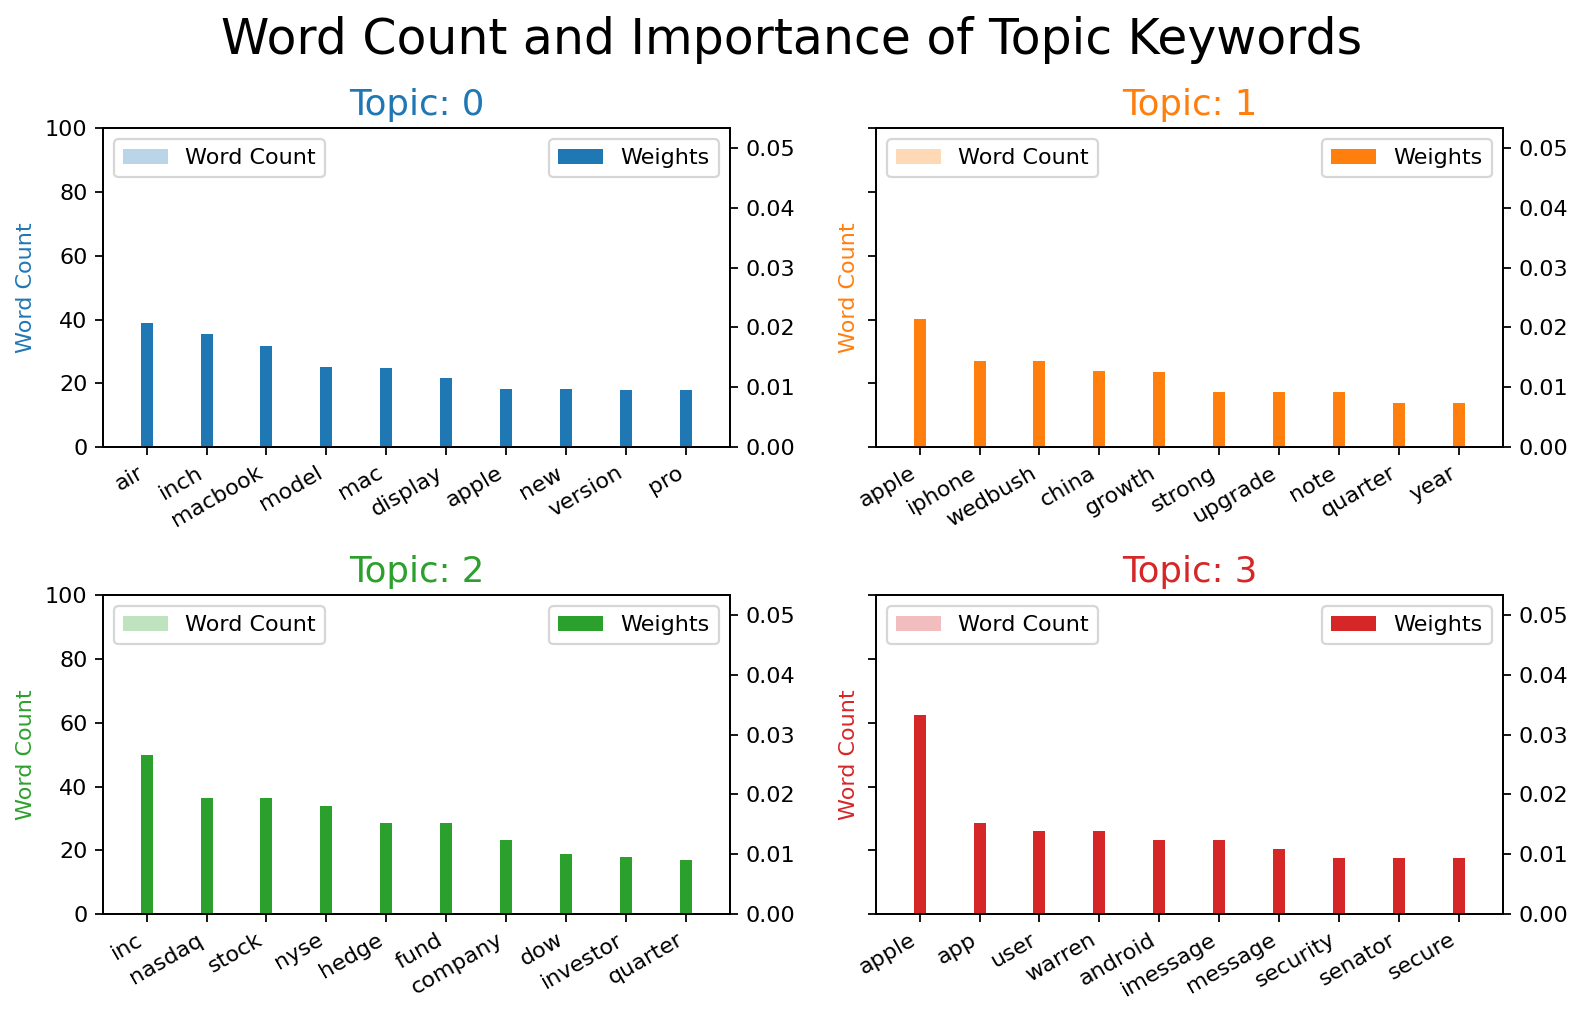

In [10]:
plot_topic_word_wordcount_weight(df, topic_set)

In [12]:
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
common_dictionary = gensim.corpora.Dictionary(c)
vis = gensimvis.prepare(a, b, common_dictionary)
pyLDAvis.display(vis)

In [13]:
a.print_topics(-1)

[(0,
  '0.021*"air" + 0.019*"inch" + 0.017*"macbook" + 0.013*"model" + 0.013*"mac" + 0.012*"display" + 0.010*"apple" + 0.010*"new" + 0.010*"version" + 0.010*"pro"'),
 (1,
  '0.021*"apple" + 0.014*"iphone" + 0.014*"wedbush" + 0.013*"china" + 0.013*"growth" + 0.009*"strong" + 0.009*"upgrade" + 0.009*"note" + 0.007*"quarter" + 0.007*"year"'),
 (2,
  '0.027*"inc" + 0.019*"nasdaq" + 0.019*"stock" + 0.018*"nyse" + 0.015*"hedge" + 0.015*"fund" + 0.012*"company" + 0.010*"dow" + 0.010*"investor" + 0.009*"quarter"'),
 (3,
  '0.033*"apple" + 0.015*"app" + 0.014*"user" + 0.014*"warren" + 0.012*"android" + 0.012*"imessage" + 0.011*"message" + 0.009*"security" + 0.009*"senator" + 0.009*"secure"')]